In [ ]:
#Import all the neccessary libraries
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
#Augment the images
datagen = ImageDataGenerator(
rotation_range=15,
rescale=1/255,
zoom_range=0.1,
horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1, validation_split=0.1)

In [ ]:
#Train dataset
trainDatagen = datagen.flow_from_directory(directory='/content/drive/My Drive/hotdogs',
                                           target_size=(128, 128),
                                           class_mode = 'binary',
                                           batch_size = 64,
                                           subset='training')

Found 632 images belonging to 2 classes.


In [ ]:
#Assign numbers to each category
trainDatagen.class_indices

{'hotdog': 0, 'other': 1}

In [ ]:
#Validation dataset
valDatagen = datagen.flow_from_directory(directory='/content/drive/My Drive/hotdogs',
                                           target_size=(128, 128),
                                           class_mode = 'binary',
                                           batch_size = 64,
                                           subset='validation')

Found 70 images belonging to 2 classes.


In [ ]:
#Define the CNN layers
model = Sequential() #I'm going to be creating a sequential model
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128, 128, 3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))i
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy']) #Compile the model

model.summary() #Get the model's summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        3

In [ ]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau #Import callback functions

In [ ]:
earlystop=EarlyStopping(patience=10) #Monitor the performance. If it dips, then stop training

In [ ]:
learning_rate_reduce=ReduceLROnPlateau(monitor='val_acc',min_lr=0.0001) #Change learning rate if not performing good enough

In [ ]:
callbacks=[earlystop,learning_rate_reduce] 

In [ ]:
#Start training the model with 10 epochs
history=model.fit_generator(generator=trainDatagen,
                            steps_per_epoch=len(trainDatagen),
                            epochs=10,
                            validation_data=valDatagen ,
                            validation_steps=len(valDatagen )
                           )

Epoch 1/10
10/10 [==============================] - 3s 350ms/step - loss: 0.5069 - accuracy: 0.7516 - val_loss: 0.5846 - val_accuracy: 0.7143
Epoch 2/10
10/10 [==============================] - 3s 314ms/step - loss: 0.5209 - accuracy: 0.7405 - val_loss: 0.5266 - val_accuracy: 0.7286
Epoch 3/10
10/10 [==============================] - 3s 318ms/step - loss: 0.4859 - accuracy: 0.7611 - val_loss: 0.5691 - val_accuracy: 0.7000
Epoch 4/10
10/10 [==============================] - 3s 317ms/step - loss: 0.4732 - accuracy: 0.7642 - val_loss: 0.5409 - val_accuracy: 0.7286
Epoch 5/10
10/10 [==============================] - 3s 316ms/step - loss: 0.4879 - accuracy: 0.7832 - val_loss: 0.5250 - val_accuracy: 0.7143
Epoch 6/10
10/10 [==============================] - 3s 329ms/step - loss: 0.4876 - accuracy: 0.7706 - val_loss: 0.5172 - val_accuracy: 0.7286
Epoch 7/10
10/10 [==============================] - 3s 326ms/step - loss: 0.4711 - accuracy: 0.7627 - val_loss: 0.5172 - val_accuracy: 0.6857
Epoch 

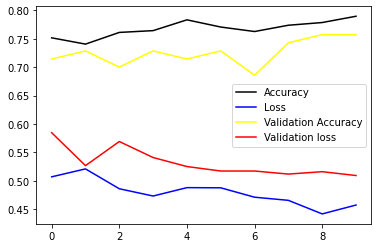

In [ ]:
#plot this model
plt.plot(history.history['accuracy'],color='black', label='Accuracy')
plt.plot(history.history['loss'],color='blue', label='Loss')
plt.plot(history.history['val_accuracy'],color='yellow', label='Validation Accuracy')
plt.plot(history.history['val_loss'],color='red', label='Validation loss')
plt.legend()
plt.show() 

In [ ]:
#Save this model as 'hotdogs.h5'
model.save('hotdogs.h5')